# Purpose

To use `xarray` for efficiently handling and visualizing the _beta_ version of the Global Fire Emissions Database version 5 (GFED5beta) for 2002 - 2022. The dataset weighs ~1.8 GiB on disk but as it comprise of compressed netCDF files which span more than the system's available memory when decompressed. `xarray` works seamlessly with `dask`, a Python library for parallel and distributed computing.

<div style="display: flex; align-items: center; justify-content: center;">
    <img src="https://xarray.dev/Xarray-assets/RGB/Xarray_Logo_RGB_Final.svg" alt="xarray logo" width="300" height="200">
    <span style="margin: 0 10px; font-size: 32px; line-height: 200px;">💖</span>    <img src="https://docs.dask.org/en/stable/_images/dask_horizontal.svg" alt="dask logo" width="300" height="200">
</div>

In [1]:
# Notebook magics for HiDPI monitors and for printing module versions
%config InlineBackend.figure_format='retina'
%load_ext watermark

In [2]:
import xarray as xr
import matplotlib.pyplot as plt

The dataset was downloaded from the first link (surfdrive cloud storage) found on https://www.globalfiredata.org/data.html. 
 
(Please replace the path below to suit your needs 😊)

In [3]:
gfed5 = xr.open_mfdataset(r"D:\Data\GFED5 beta\monthly\*")
gfed5

<xarray.Dataset> Size: 44GB
Dimensions:         (time: 252, lat: 720, lon: 1440)
Coordinates:
  * lat             (lat) float32 3kB 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
  * lon             (lon) float32 6kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * time            (time) datetime64[ns] 2kB 2002-01-01T01:00:00 ... 2022-12...
Data variables: (12/43)
    basisregions    (time, lat, lon) int8 261MB dask.array<chunksize=(12, 720, 1440), meta=np.ndarray>
    grid_area       (time, lat, lon) float32 1GB dask.array<chunksize=(12, 720, 1440), meta=np.ndarray>
    burned_area     (time, lat, lon) float32 1GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    C               (time, lat, lon) float32 1GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    DM              (time, lat, lon) float32 1GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    CO2             (time, lat, lon) float32 1GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ...              ...
    HCN             (time, lat, lon) float32 1GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    HCOOH           (time, lat, lon) float32 1GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    CH3COOH         (time, lat, lon) float32 1GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    MEK             (time, lat, lon) float32 1GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    CH3COCHO        (time, lat, lon) float32 1GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    HOCH2CHO        (time, lat, lon) float32 1GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes:
    title:     GFED5 2002
    subtitle:  Global Fire Emissions Database (GFED) version 5 monthly trace ...

🪙 __Metadata is GOLD__ 🪙

It is a good practice to preserve metadata whenever preprocessing a dataset for your needs. It is a shame to loose e.g., __units__ by being sloppy during preprocessing. Let's change the attributes to reflect the fact that we have years 2002 - 2022:

In [4]:
gfed5.attrs['title'] = 'GFED5 Beta 2002 - 2022'
gfed5.attrs['subtitle'] = ('Global Fire Emissions Database (GFED) version 5 monthly trace gas'
                           'and aerosol emissions spanning 2002-2022. Note this is a Beta version'
                           'and numbers will change. Data merged using xarray.')
gfed5

<xarray.Dataset> Size: 44GB
Dimensions:         (time: 252, lat: 720, lon: 1440)
Coordinates:
  * lat             (lat) float32 3kB 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
  * lon             (lon) float32 6kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * time            (time) datetime64[ns] 2kB 2002-01-01T01:00:00 ... 2022-12...
Data variables: (12/43)
    basisregions    (time, lat, lon) int8 261MB dask.array<chunksize=(12, 720, 1440), meta=np.ndarray>
    grid_area       (time, lat, lon) float32 1GB dask.array<chunksize=(12, 720, 1440), meta=np.ndarray>
    burned_area     (time, lat, lon) float32 1GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    C               (time, lat, lon) float32 1GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    DM              (time, lat, lon) float32 1GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    CO2             (time, lat, lon) float32 1GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ...              ...
    HCN             (time, lat, lon) float32 1GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    HCOOH           (time, lat, lon) float32 1GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    CH3COOH         (time, lat, lon) float32 1GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    MEK             (time, lat, lon) float32 1GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    CH3COCHO        (time, lat, lon) float32 1GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    HOCH2CHO        (time, lat, lon) float32 1GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes:
    title:     GFED5 Beta 2002 - 2022
    subtitle:  Global Fire Emissions Database (GFED) version 5 monthly trace ...

The entire dataset weighs nearly 41 GiB, which exceeds this machine's available memory:

In [5]:
gfed5.nbytes / 1024**3 # 1 Gib = 1024 * 1024 * 1024 bytes

41.1227802336216

`xarray` utilizes `dask` to perform out-of-memory computations in a lazy way. This allows us to efficiently work with big data. More examples of the powar of `xarray` + `dask` will follow.

There is a `grid_area` variable which is the same across time all time instances:

In [6]:
gfed5['grid_area'].all().compute()

<xarray.DataArray 'grid_area' ()> Size: 1B
array(True)

We have to use `.compute` as the operation is on `dask` objects which are lazily evaluated. 

So let's take the first time instance and plot it:

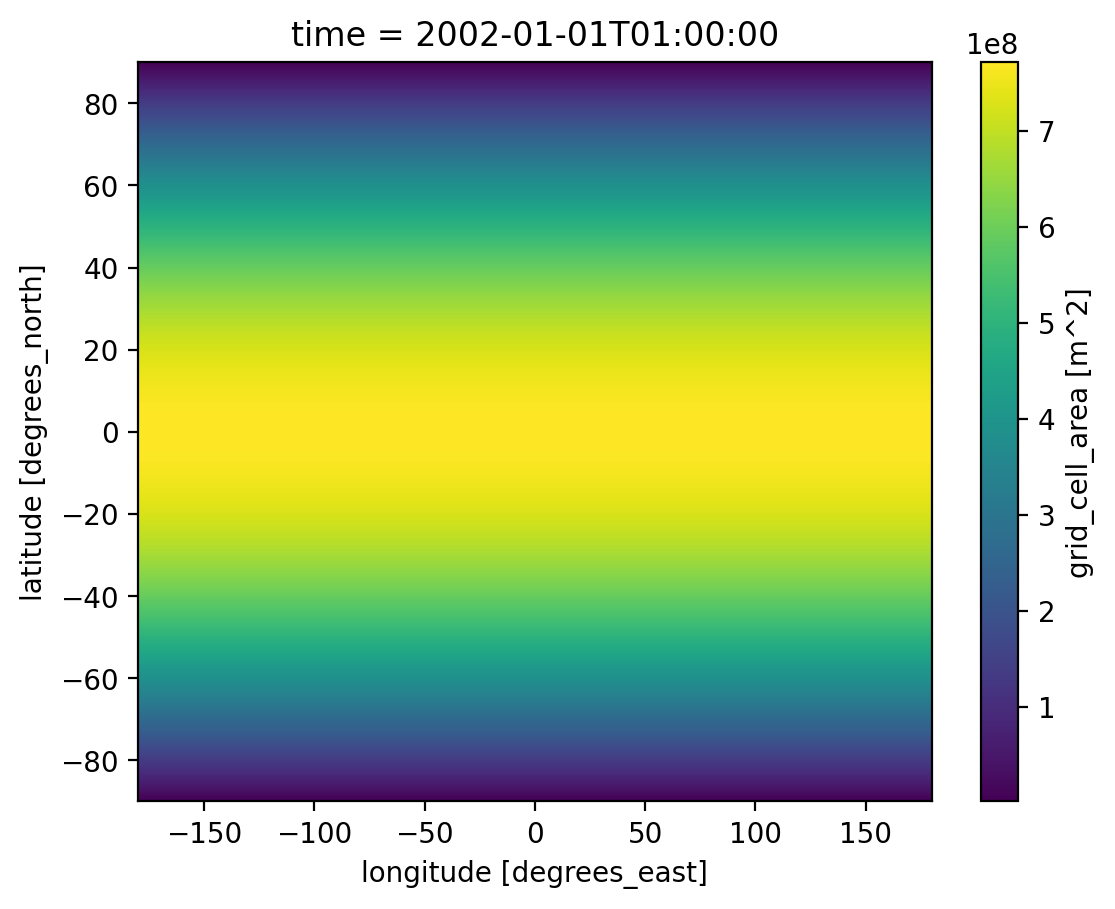

In [7]:
grid_area = gfed5['grid_area'][0]
grid_area.plot();

Nothing more impressive than the expected $\cos(\text{latitude})$ appearance. Area is in $m^2$.

Thankfully the dataset includes the total carbon (C) emissions in $g\ m^{-2}\ \text{month}^{-1}$. This is extremely useful if we want to do our own computation for C given the individual carbonaceous species and confirm that our code for the computation is correct.

In [8]:
gfed5['C']

<xarray.DataArray 'C' (time: 252, lat: 720, lon: 1440)> Size: 1GB
dask.array<concatenate, shape=(252, 720, 1440), dtype=float32, chunksize=(1, 720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 3kB 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
  * lon      (lon) float32 6kB -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * time     (time) datetime64[ns] 2kB 2002-01-01T01:00:00 ... 2022-12-01T01:...
Attributes:
    units:          g C m^-2 month^-1
    standard_name:  GFED5 emissions of carbon

You can see that C only requires nearly 1 GiB of storage. `xarray` can handle out-of-memory computations by employing the power of `dask` which lets the user perform computations on big data. Sometimes big data issues can be hidden like in our case, when we work with compressed netCDF files which look innocuous on disk. NetCDF files have to be decompressed in order to be processed. This is inevitable, and keep in mind that netCDF decompression is a major bottleneck.

Citing xarray's documentation:

> Data is _always_ loaded lazily from netCDF files. You can manipulate, slice and subset Dataset and DataArray objects, and no array values are loaded into memory until you try to perform some sort of actual computation.

# Map of carbon flux for January 2005

In the following we will produce some quick plots for C to see what's going on. This is a map of total carbon emisions for January 2005 (date picked randomly):

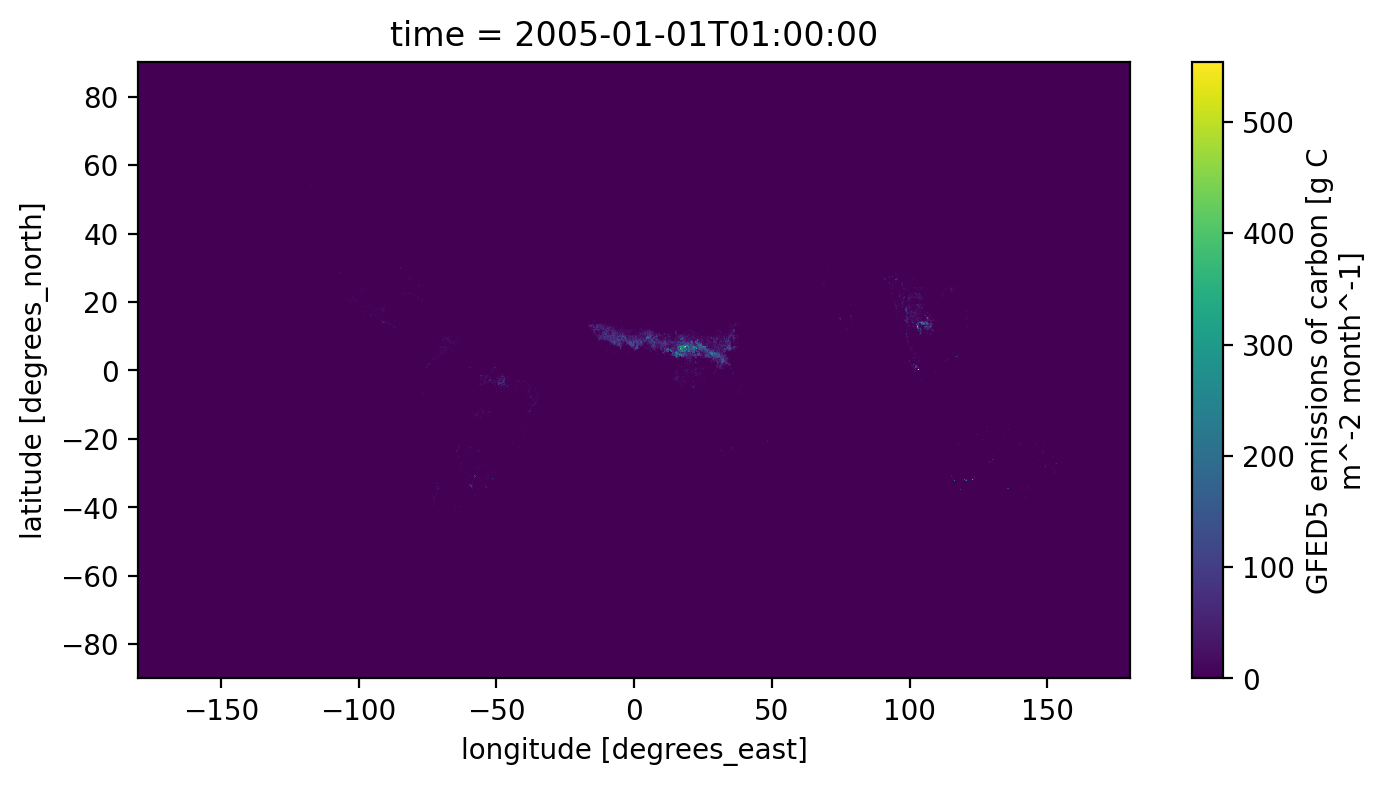

In [9]:
gfed5['C'].sel(time='2005-01-01').plot(size=4, aspect=2);

With default plotting settings, the plot seems dull. There is not much is visible as the distribution of values is highly concentrated towards zero, with the exception of a few extreme values, as we can see in a histogram. Note the y axis is logarithmic.

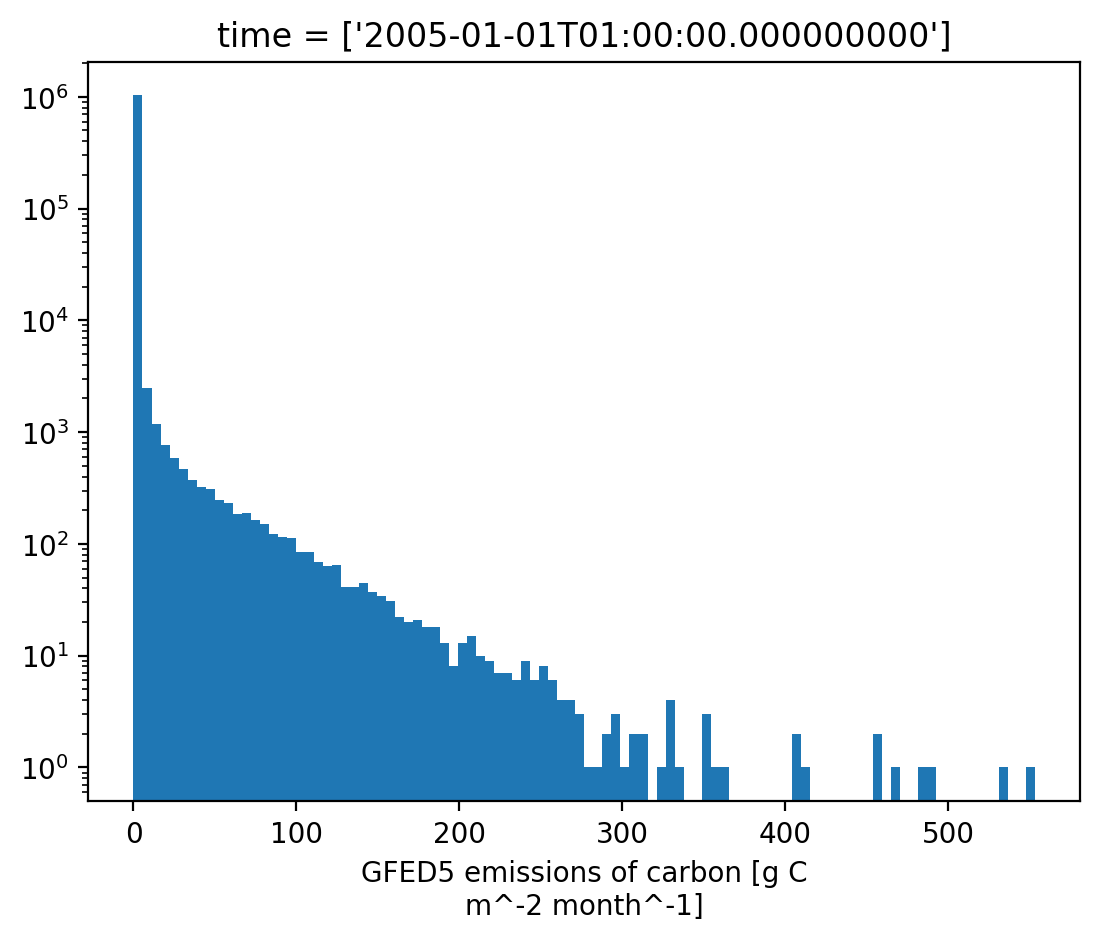

In [10]:
gfed5['C'].sel(time='2005-01-01').plot.hist(bins=100, log=True);

# Map of yearly mean carbon flux

We have 20 + 1 years or 252 months in the dataset:

In [11]:
gfed5.sizes['time']

252

We don't need a weighted mean as each pixel of the plot represents the mean value for that specific pixel. The mean is taken across time, and as we have monthly values, again there is no need to do any weighting.

In [12]:
yearly_mean = gfed5['C'].resample(time='YE').sum().mean(dim='time')
yearly_mean

<xarray.DataArray 'C' (lat: 720, lon: 1440)> Size: 4MB
dask.array<mean_agg-aggregate, shape=(720, 1440), dtype=float32, chunksize=(720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 3kB 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
  * lon      (lon) float32 6kB -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9

Let's perform and store the actual computation for our plots:

In [13]:
from dask.diagnostics import ProgressBar # ASCII progress bar. Use: with ProgressBar():
from tqdm.dask import TqdmCallback       # Graphical progress bar. Use: with TqdmCallback(desc="Compute"):

In [14]:
with TqdmCallback(desc="Computing yearly mean"):
    yearly_mean = yearly_mean.compute()

Computing yearly mean:   0%|          | 0/1121 [00:00<?, ?it/s]

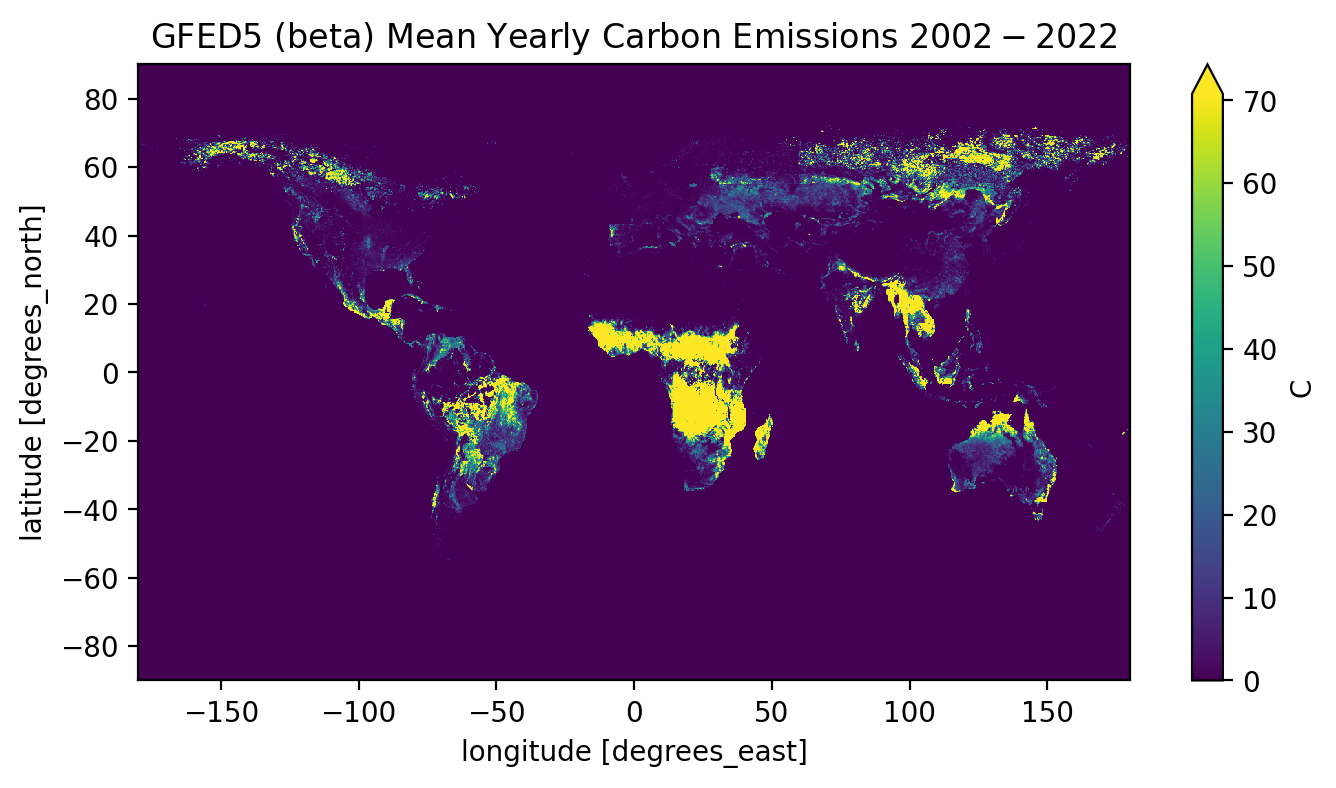

In [15]:
yearly_mean.plot(size=4, aspect=2, robust=True);
plt.title('GFED5 (beta) Mean Yearly Carbon Emissions $2002-2022$');

Note the color bar label. `.plot` doesn't know what to do with units. There are disciplined solutions for unit handling which are outside of the purposes of this notebook. 

The units are $g\ \text{month}^{-1} \ m^{-2}$. This is a _flux_. We must multiply the `yearly_mean` with 12 months/year and update the colorbar label.

In [16]:
yearly_mean *= 12

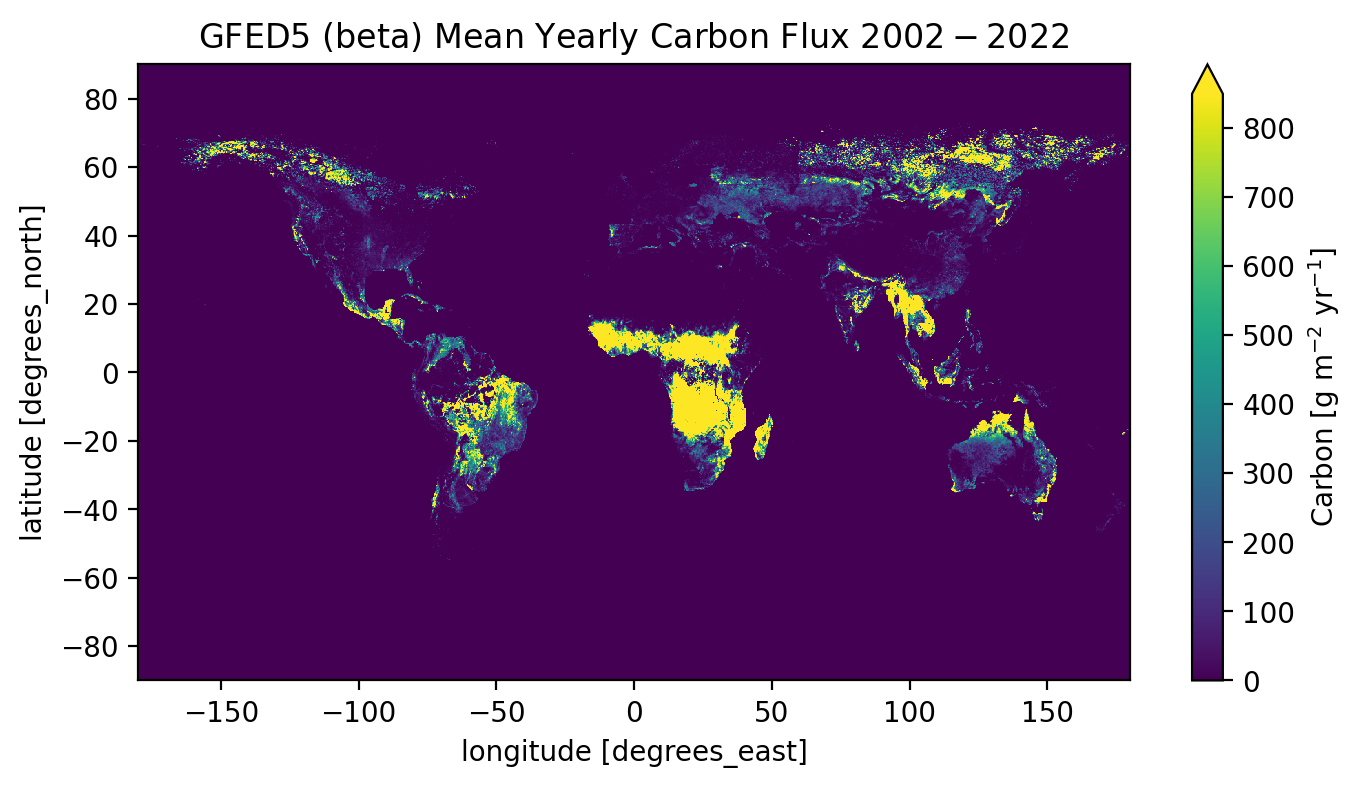

In [17]:
yearly_mean.plot(size=4, aspect=2,
                 robust=True,
                 cbar_kwargs={'label': 'Carbon [g m$^{-2}$ yr$^{-1}$]'})

plt.title('GFED5 (beta) Mean Yearly Carbon Flux $2002-2022$');

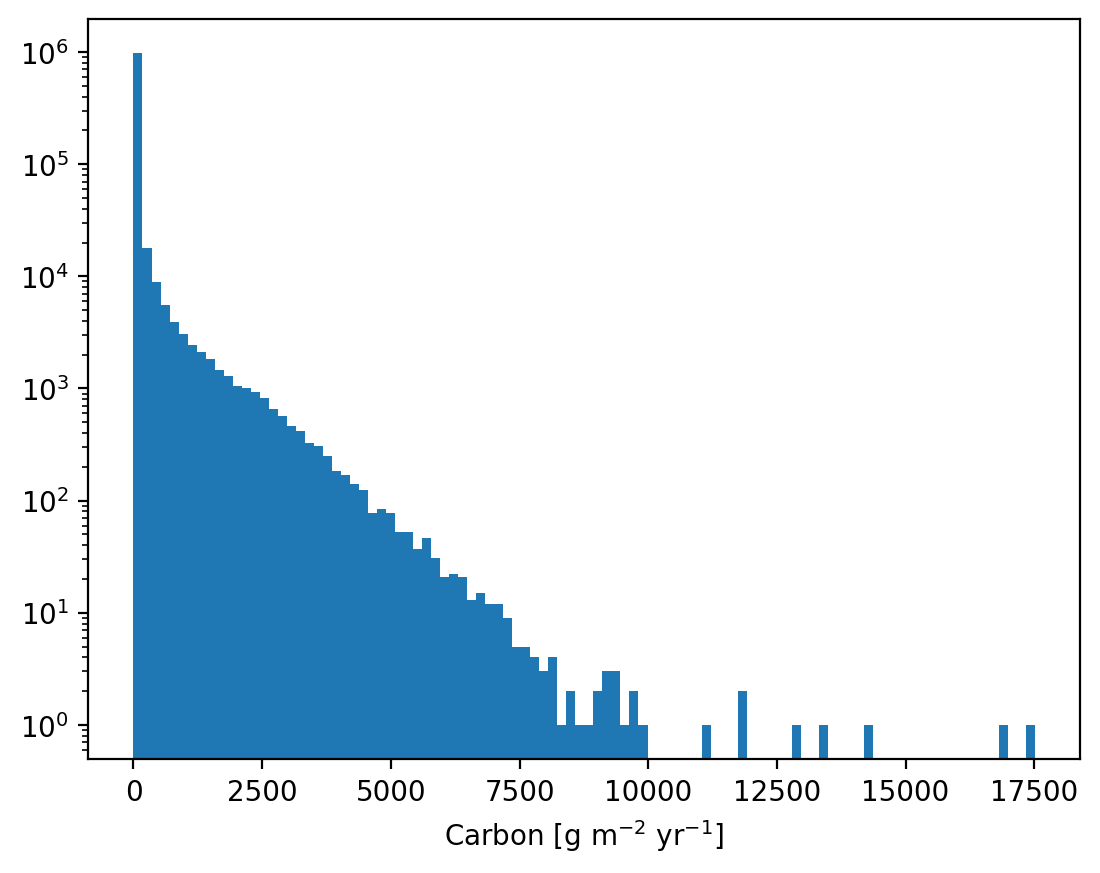

In [18]:
yearly_mean.plot.hist(bins=100, log=True)
plt.xlabel('Carbon [g m$^{-2}$ yr$^{-1}$]');

# Timeseries of global monthly emissions

In [19]:
with TqdmCallback(desc="Computing global monthly emissions"):
    spatial_sum = (gfed5['C'] * grid_area / 1e12).sum(dim=['lon', 'lat']).compute()

Computing global monthly emissions:   0%|          | 0/1011 [00:00<?, ?it/s]

Here we need the grid area in order to compute the global monthly C emissions. Since 1 Tg = $10^{12}$ g, we divide by 1e12 to have our result in Tg. 

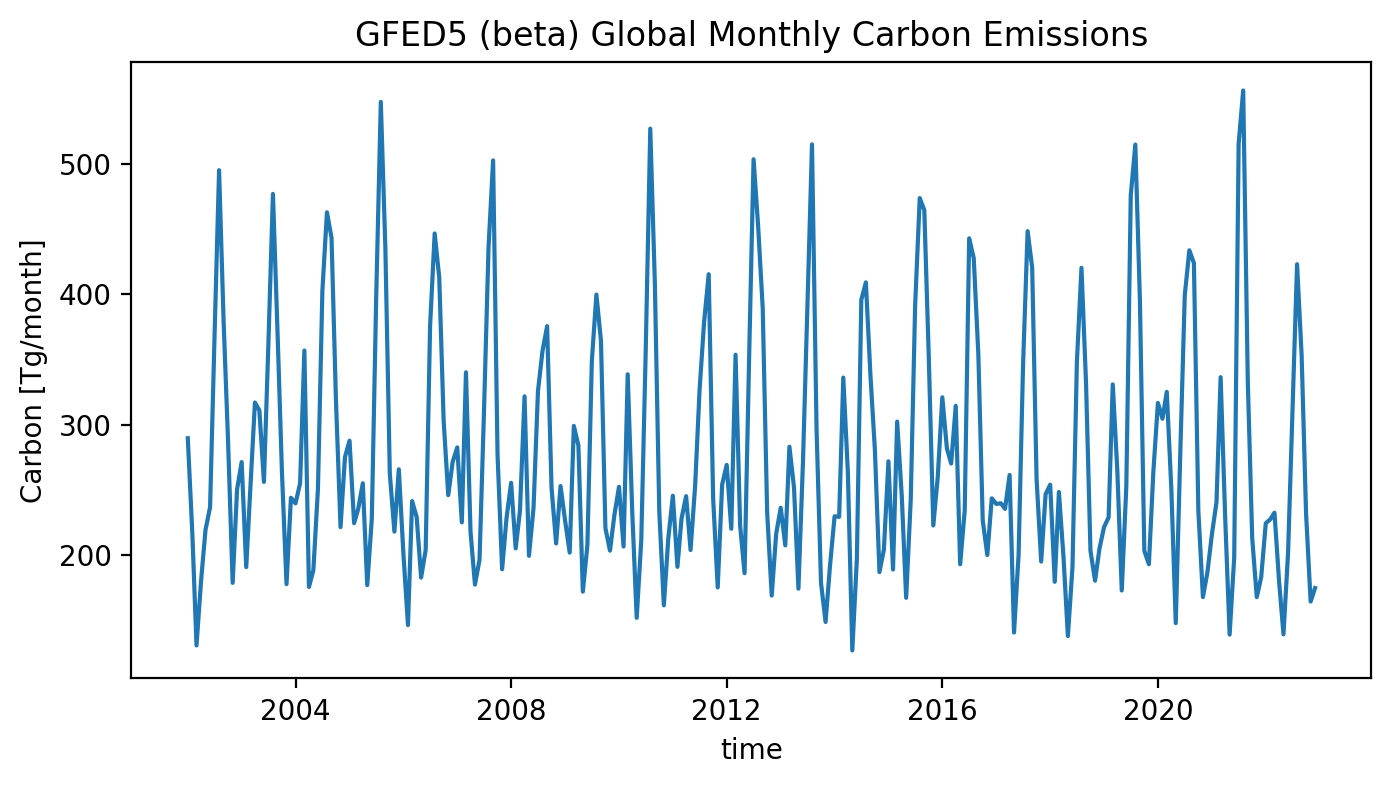

In [20]:
spatial_sum.plot(size=4, aspect=2)
plt.ylabel('Carbon [Tg/month]')
plt.title('GFED5 (beta) Global Monthly Carbon Emissions');

For plotting yearly totals, we can just resample the monthly totals by summing at a yearly frequency:

In [21]:
spatial_sum_yearly = spatial_sum.resample(time='YE').sum()

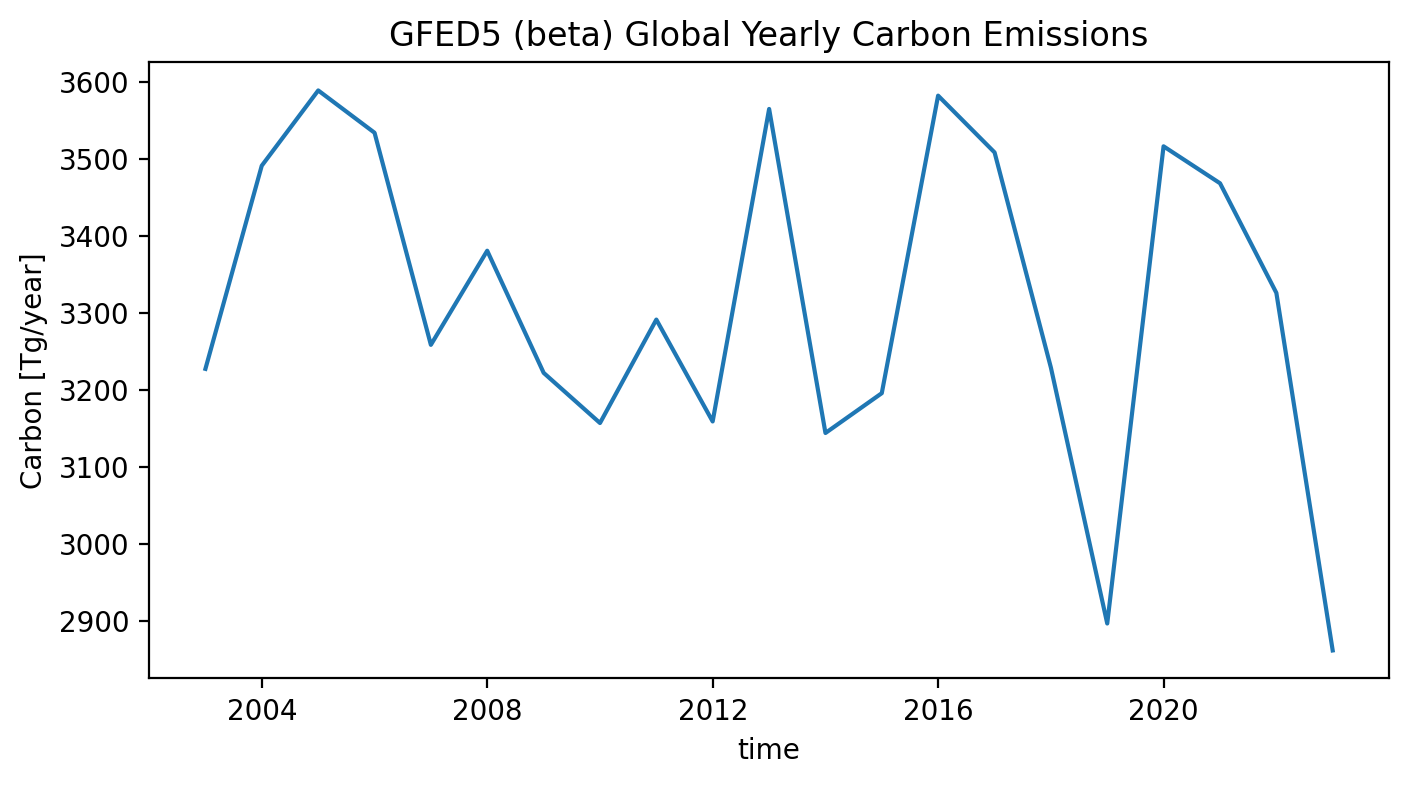

In [22]:
spatial_sum_yearly.plot(size=4, aspect=2)
plt.ylabel('Carbon [Tg/year]')
plt.title('GFED5 (beta) Global Yearly Carbon Emissions');

You can check if the order of magnitudes for the yearly map and the monthly timeseries are correct by comparing with GFED4s: [Global fire emissions estimates during 1997–2016](https://essd.copernicus.org/articles/9/697/2017/), figures 8 and 10.

# Publish-quality figures

Let's make some of the above figures better:

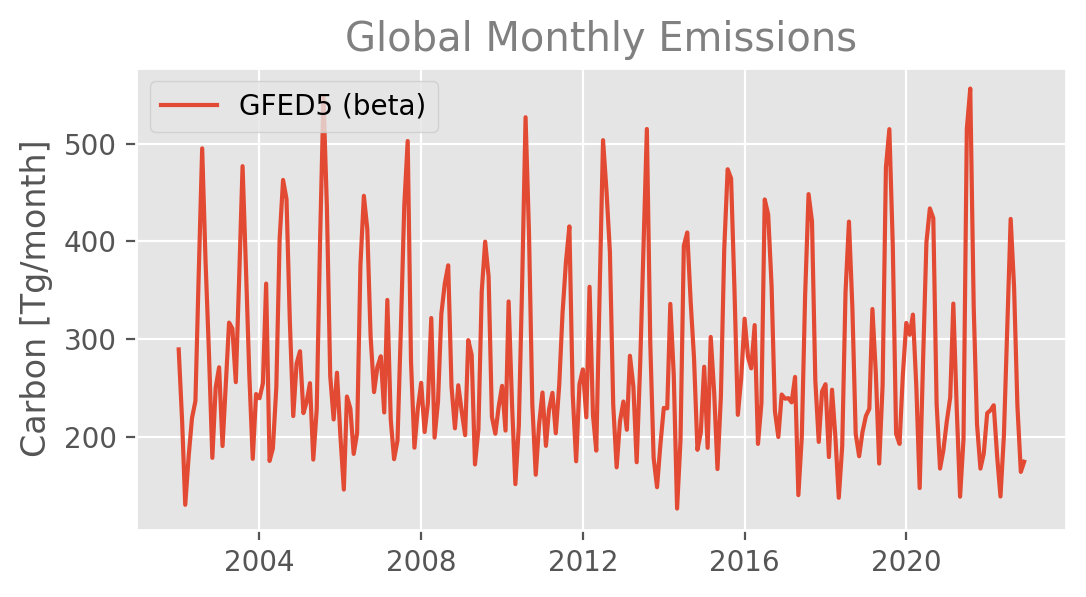

In [23]:
with plt.style.context('ggplot'):
    spatial_sum.plot(size=3, aspect=2, label='GFED5 (beta)')
    plt.ylabel('Carbon [Tg/month]')
    plt.title('Global Monthly Emissions', color='grey')
    plt.xlabel(None)
    plt.legend();

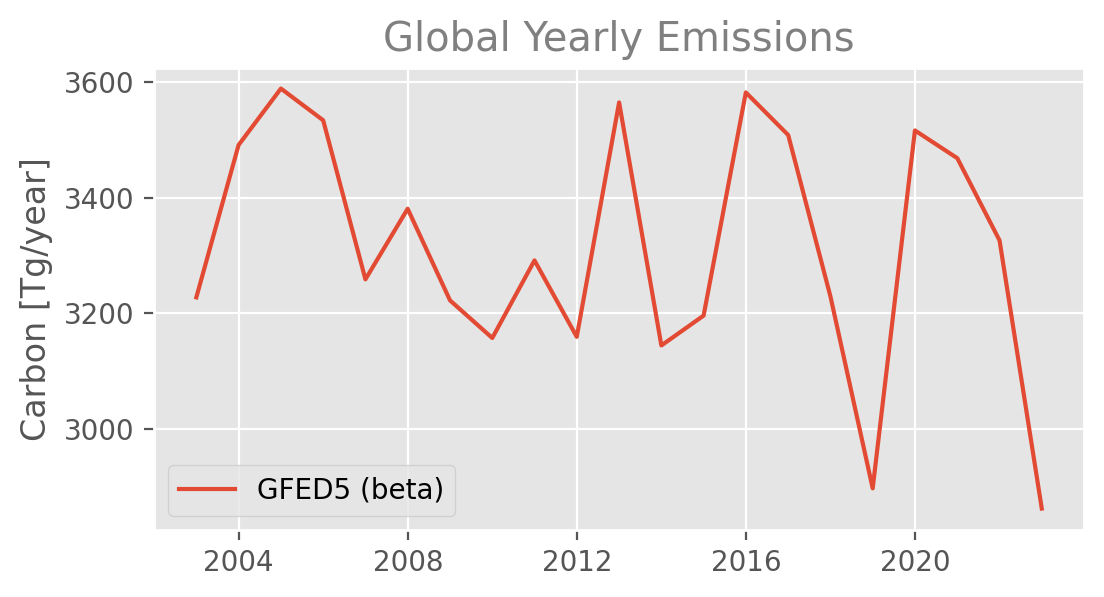

In [24]:
with plt.style.context('ggplot'):
    spatial_sum_yearly.plot(size=3, aspect=2, label='GFED5 (beta)')
    plt.ylabel('Carbon [Tg/year]')
    plt.title('Global Yearly Emissions', color='grey')
    plt.xlabel(None)
    plt.legend();

In [25]:
import cartopy.crs as ccrs
import cartopy.feature

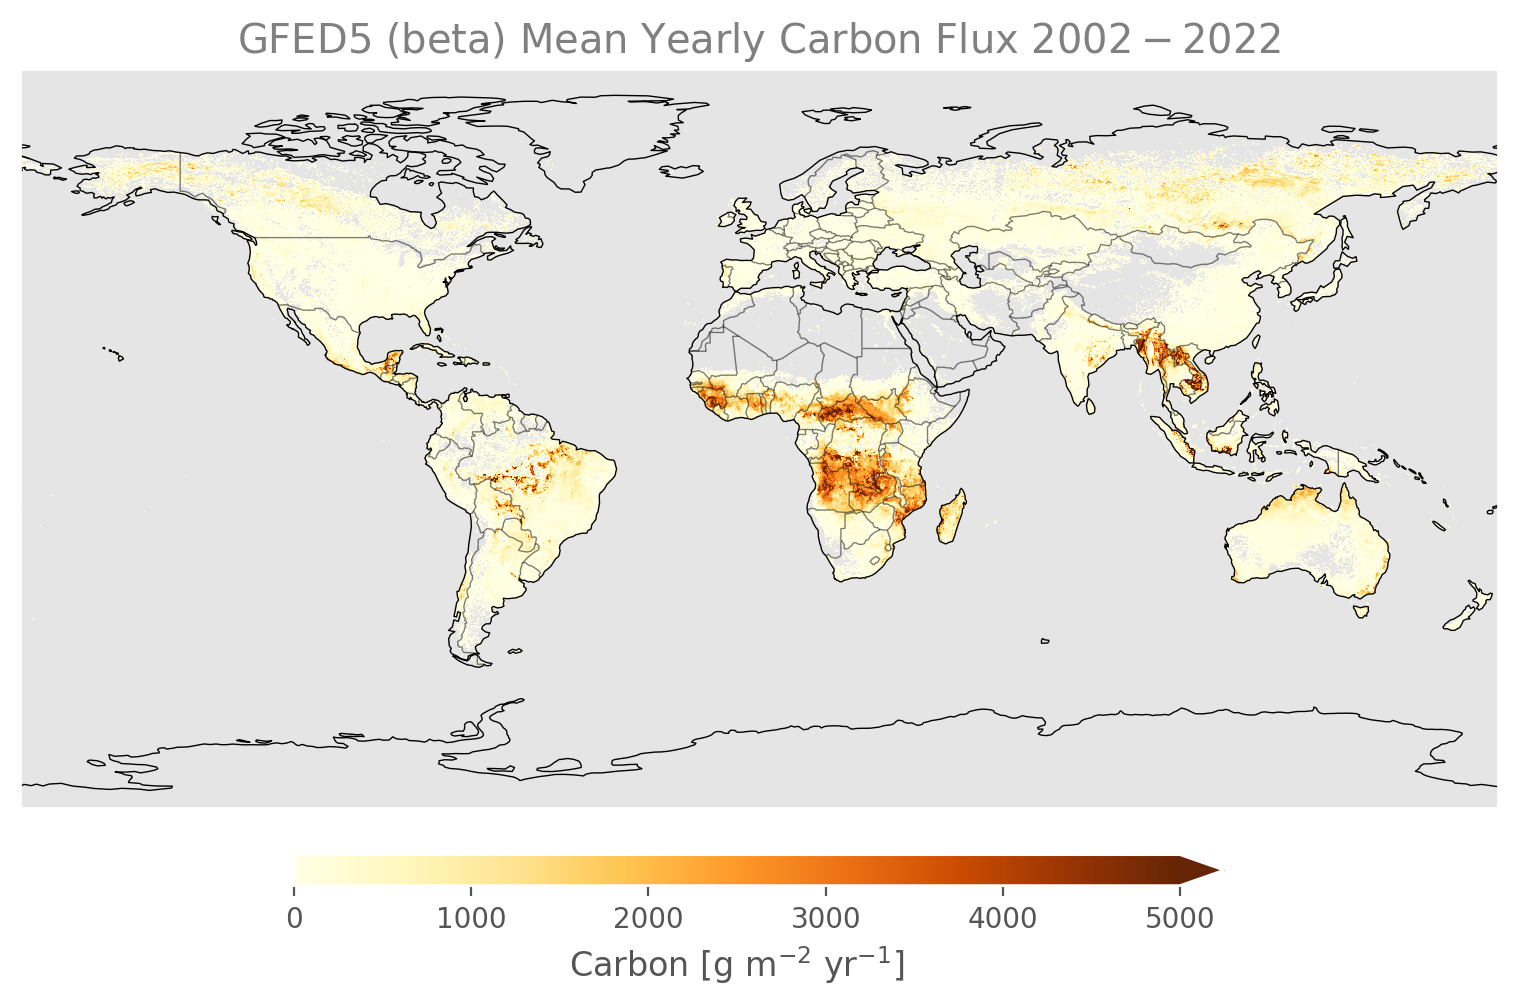

In [26]:
with plt.style.context('ggplot'):
    (yearly_mean
        .where(yearly_mean !=0)
        .plot(size=6, aspect=2,
              vmin=0, vmax=5000,
              cmap='YlOrBr',
              cbar_kwargs={'label': 'Carbon [g m$^{-2}$ yr$^{-1}$]',
                           'location': 'bottom', 'pad': 0.05, 'shrink': 0.5, 'aspect': 30},
              transform=ccrs.PlateCarree(), subplot_kws={"projection": ccrs.PlateCarree()},
             ));
    ax = plt.gca()
    ax.coastlines()
    ax.add_feature(cartopy.feature.BORDERS, alpha=0.5)
    
    plt.title('GFED5 (beta) Mean Yearly Carbon Flux $2002-2022$', color='grey');

# Why use Jupyter instead of Spyder?

Reddit provides a great answer to this difficult philosophical question (slightly edited): 

> Jupyter is widely used in science, engineering, and consulting. The idea is you prepare a self-contained analysis with all of the code alternating with markdown blocks explaining the theory, methods, and assumptions you are using. Then you can give it to a client or coworker and it's fully transparent what you have done to produce the tables and figures.
> 
> There's also groups out there that provide Jupyter notebooks demonstrating how each figure in a publication was produced and putting it on GitHub and linking to it from their paper. That way the data analysis is transparent and reproducible, and well-documented.
>
> You're not supposed to write 1000 lines in a Jupyter notebook just like you shouldn't write a 1000 line analysis script. Typically you put a module (or several) in the same folder if you've written some heavy logic, or you just use functions from existing packages to do some linear procedural logic/analysis. And each notebook should have a single goal with a logical and human readable progression of operations from one block to the next.
>
> When done well it's extremely effective for communication. Of course like anything it can be done poorly and be a mess. No different from how a badly written report or badly written module are bad for communication.
>
> Of course it's not meant for writing "production code" depending on what you mean by that. If no one else is ever going to look at the notebook and it's going to be a backend running on some server then yeah that's totally ridiculous. But it can be used for writing code that's going to actually do stuff for clients (internal or external). You can save figures and data to file from a notebook just like in any other python script.

— [Anonymous Redditor](https://www.reddit.com/r/datascience/comments/v8qv68/comment/ibshe29/)


# Xarray tutorial

Check out this awesome `xarray` tutorial!

__Henderson et al. - Xarray: Friendly, Interactive, and Scalable Scientific Data Analysis | SciPy 2024__

[![Henderson et al. - Xarray: Friendly, Interactive, and Scalable Scientific Data Analysis | SciPy 2024](https://img.youtube.com/vi/81CnwVsyvhk/0.jpg)](https://youtu.be/81CnwVsyvhk?feature=shared&t=750)


# What to do next?

- [ ] A more elaborate color mapping in order to better visualize areas of low-emissions.

# Module versions

Python and module versions:

In [27]:
%watermark -a "Manolis Petrakis" -u -d
%watermark --iversions

Author: Manolis Petrakis

Last updated: 2025-07-03

tqdm      : 4.67.1
xarray    : 2025.6.1
sys       : 3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]
cartopy   : 0.24.1
dask      : 2024.8.1
json      : 2.0.9
matplotlib: 3.10.0
IPython   : 8.30.0

